In [1]:
%matplotlib inline
import pandas as pd

In [2]:
cast = pd.read_csv('/content/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
titles = pd.read_csv('/content/titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [7]:
release_dates = pd.read_csv('/content/release_dates.csv')
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


What are the ten most common movie names of all time?

In [16]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Freedom                 11
Honeymoon               11
Othello                 11
The Three Musketeers    11
Name: title, dtype: int64

Which three years of the 1930s saw the most films released?

In [17]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

Plot the number of films that have been released each decade over the history of cinema

<Axes: >

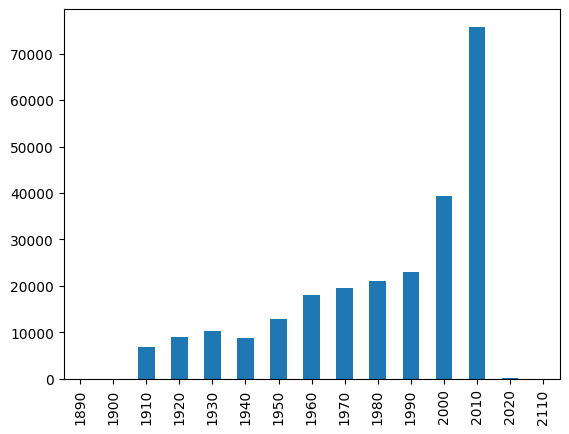

In [19]:
titles['decade'] = ((titles.year // 10) * 10)
titles.decade.value_counts().sort_index().plot(kind='bar')

Plot the number of "Hamlet" films made each decade.

<Axes: >

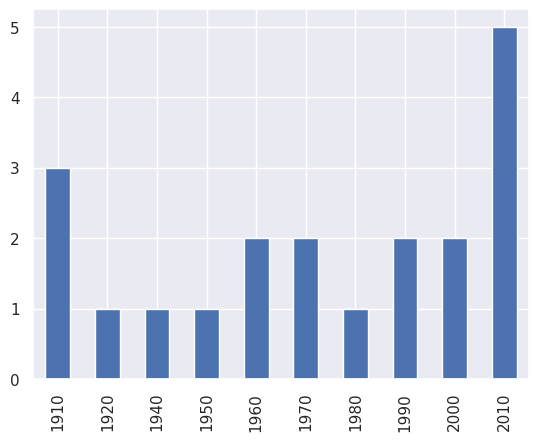

In [24]:
titles['decade'] = ((titles.year // 10) * 10)
titles[titles.title=='Hamlet'].decade.value_counts().sort_index().plot(kind='bar')

Plot the number of "Rustler" characters in each decade of the history of film.

<Axes: >

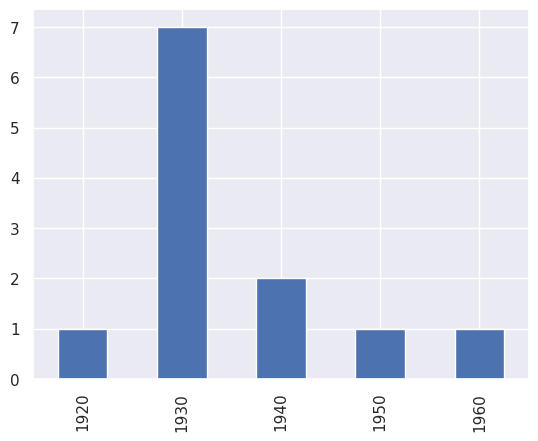

In [25]:
cast['decade'] = ((cast.year // 10) * 10)
cast[cast.character=='Rustler'].decade.value_counts().sort_index().plot(kind='bar')


Plot the number of "Hamlet" characters each decade.

<Axes: >

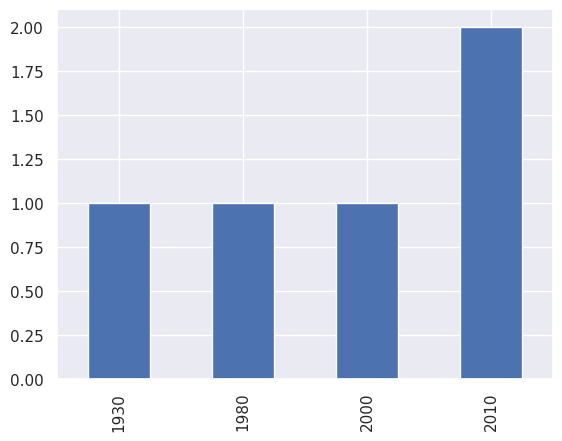

In [26]:
cast['decade'] = ((cast.year // 10) * 10)
cast[cast.character=='Hamlet'].decade.value_counts().sort_index().plot(kind='bar')

What are the 11 most common character names in movie history?

In [27]:
cast.character.value_counts().head(11)

Himself           1325
Extra              460
Doctor             455
Policeman          403
Townsman           376
Waiter             354
Reporter           347
Bartender          327
Police Officer     319
Soldier            294
Dancer             286
Name: character, dtype: int64

Who are the 10 people most often credited as "Herself" in film history?

In [28]:
cast[cast.character=='Herself'].name.value_counts().head(10)

Etta Baker    1
Name: name, dtype: int64

Who are the 10 people most often credited as "Himself" in film history?

In [29]:
cast[cast.character=='Himself'].name.value_counts().head(10)

Muhammad Ali             18
Amitabh Bachchan         12
Steve Allen               8
Diego Aramburu-Zabala     8
Neil Armstrong            7
Marv Albert               6
Aar?n Arce                6
Tom Arnold                5
Max Baer                  4
Yasser Arafat             4
Name: name, dtype: int64

Which actors or actresses appeared in the most movies in the year 1945?

In [30]:
cast[cast.year==1945].name.value_counts().head(10)

Eddie Acuff          20
Roy Barcroft         19
Jimmy Aubrey         18
Ernie Adams          16
Fred Aldrich         16
Sam Ash              15
Bobby Barber         14
Richard Alexander    13
Walter Baldwin       13
Charles Arnt          9
Name: name, dtype: int64

Which actors or actresses appeared in the most movies in the year 1985?

In [31]:
cast[cast.year==1985].name.value_counts().head(10)

Raj Babbar        15
Asrani            13
Lalu Alex          9
Vikas Anand        9
Bahadur            8
Mala Aravindan     7
Max Alvarado       6
C?neyt Arkin       6
Balot              5
Tommy Abuel        5
Name: name, dtype: int64

Plot how many roles Mammootty has played in each year of his career.

IndexError: ignored

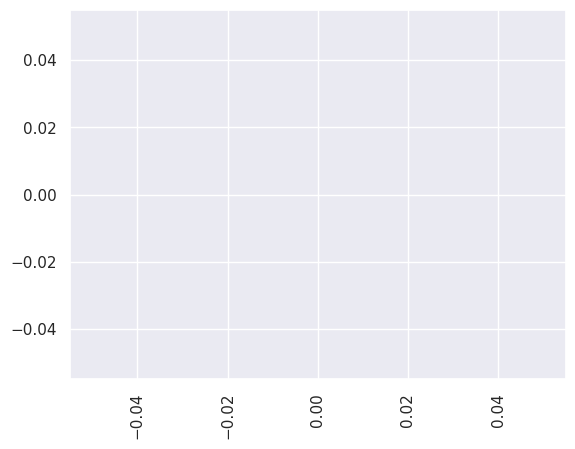

In [35]:
cast[cast.name=='Ron Jeremy'].year.value_counts().sort_index().plot(kind='bar')

What are the 10 most frequent roles that start with the phrase "Patron in"?

In [36]:
c = cast[cast.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Chinese Restaurant    1
Patron in restaurant            1
Patron in Restaurant            1
Patron in Ballroom              1
Patron in Audience              1
Patron in Coffee Shop           1
Patron in Club                  1
Patron in the Coffee House      1
Name: character, dtype: int64

What are the 10 most frequent roles that start with the word "Science"?

In [37]:
c = cast[cast.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher        3
Science Student        1
Science Kid            1
Science Monk           1
Science Officer 3      1
Science Performer 3    1
Name: character, dtype: int64

Plot the n-values of the roles that Judi Dench has played over her career.

<Axes: xlabel='year', ylabel='n'>

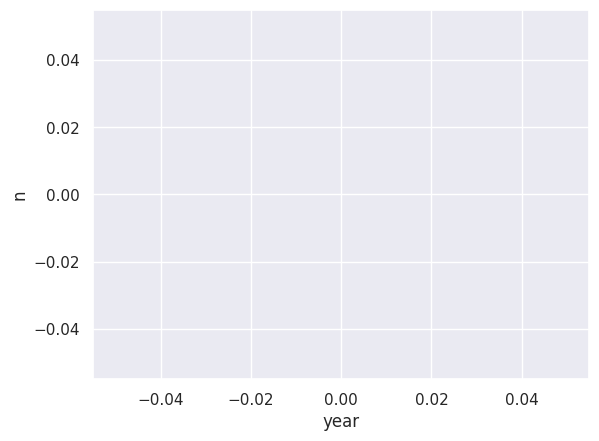

In [38]:
c=cast[cast.name=="Judi Dench"]
#c.n.value_counts().sort_index().plot(kind="bar")
c.plot(kind="scatter",x='year',y='n',alpha=0.5)

Plot the n-values of Cary Grant's roles through his career.

<Axes: xlabel='year', ylabel='n'>

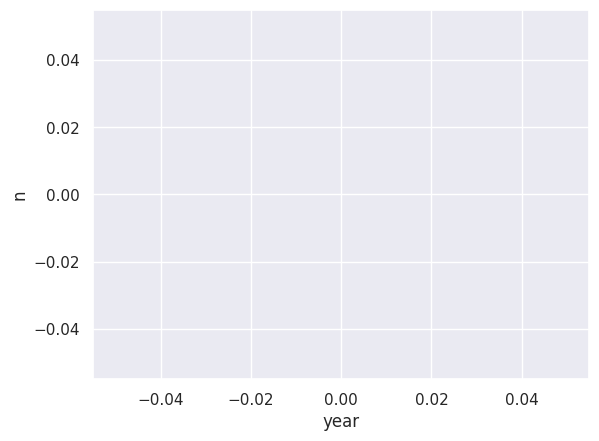

In [39]:
d=cast[cast.name=="Cary Grant"]
#c.n.value_counts().sort_index().plot(kind="bar")
d.plot(kind="scatter",x='year',y='n',alpha=0.5)

Plot the n-value of the roles that Sidney Poitier has acted over the years.

<Axes: xlabel='year', ylabel='n'>

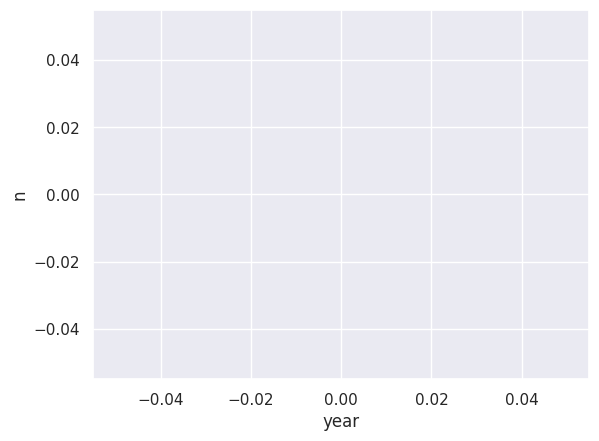

In [40]:
cast[cast.name=='Ron Jeremy'].plot(kind='scatter',x='year',y='n')

How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [41]:
cast[(cast.year//10==195)&(cast.n==1)].type.value_counts()

actor    495
Name: type, dtype: int64

How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
cast[(cast.year//10==195)&(cast.n==2)].type.value_counts()

actor    270
Name: type, dtype: int64